In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier 

In [95]:
# Load the dataset
data = pd.read_csv('datasetnew.csv')

In [96]:
features = ['Species','Plant_Height', 'No._of_leaves_in_a_cluster',
            'Length_Width_LeafRatio','Average_angle_of_leaf_divergence_from_vertical'] 

data = data.drop('Leaf height', axis=1)
data = data.drop('Leaf Width', axis=1)


data.columns = features
# Explore the data
data.head()

,Species,Plant_Height,No._of_leaves_in_a_cluster,Length_Width_LeafRatio,Average_angle_of_leaf_divergence_from_vertical
0,Sansevieria trifasciata Hahnii,23.0,20,2.22,37.21
1,Sansevieria trifasciata Hahnii,23.0,20,2.88,22.00
2,Sansevieria trifasciata Hahnii,23.0,20,3.14,15.73
3,Sansevieria trifasciata Hahnii,23.0,20,1.82,29.45
4,Sansevieria trifasciata Hahnii,26.0,15,2.00,41.12


In [97]:
import pandas as pd

def replace_missing_with_zeros(data):
    """
    Replace missing values with zeros in the dataset.

    Parameters:
    - data: pandas DataFrame, input dataset with missing values

    Returns:
    - data_filled: pandas DataFrame, dataset with missing values replaced by zeros
    """
    data_filled = data.fillna(0)
    return data_filled

# Replace missing values with zeros
data_filled = replace_missing_with_zeros(data)

# Check for missing values after replacement
print(data_filled.isnull().sum())

# Explore the data
print(data_filled.head())


Species                                           0
Plant_Height                                      0
No._of_leaves_in_a_cluster                        0
Length_Width_LeafRatio                            0
Average_angle_of_leaf_divergence_from_vertical    0
dtype: int64
                          Species  Plant_Height  No._of_leaves_in_a_cluster  \
0  Sansevieria trifasciata Hahnii          23.0                          20   
1  Sansevieria trifasciata Hahnii          23.0                          20   
2  Sansevieria trifasciata Hahnii          23.0                          20   
3  Sansevieria trifasciata Hahnii          23.0                          20   
4  Sansevieria trifasciata Hahnii          26.0                          15   

   Length_Width_LeafRatio  Average_angle_of_leaf_divergence_from_vertical  
0                    2.22                                           37.21  
1                    2.88                                           22.00  
2                    3.1

In [98]:
features = data.drop('Species', axis=1)  # Drop the 'species' column (label)
labels = data['Species'].to_numpy()          # Select the 'species' column (label)

encoder = OneHotEncoder(sparse=False)
# Fit the encoder on the labels to learn the categories
encoder.fit(labels.reshape(-1, 1))  # Reshape labels if needed
# Transform the labels into a one-hot encoded NumPy array
labels_encoded = encoder.transform(labels.reshape(-1, 1))

In [99]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Normalize features
features_normalized = scaler.fit_transform(features)

In [100]:
# Assuming your data is loaded into features (X) and labels (y) arrays
train_features, X_val_test, train_labels, y_val_test = train_test_split(features, labels_encoded, test_size=0.4)

# Further split the validation and test set (adjust test_size as needed)
val_features, test_features, val_labels, test_labels = train_test_split(X_val_test, y_val_test, test_size=0.6)



print(len(train_features))
print(len(val_features))
print(len(test_features))
# print(len(new_features))

70
19
29


In [101]:
# import numpy as np


# def vectorize_sequences(sequences, dimension=None):
#   """
#   One-hot encodes a list of sequences (can handle non-integer values).

#   Args:
#       sequences: A list of sequences.
#       dimension: (Optional) The dimension of the one-hot encoded representation.
#                  If None, it will be determined by the unique values in the sequences.

#   Returns:
#       A numpy array of shape (len(sequences), dimension) where each row is a one-hot encoded sequence.
#   """
#   if dimension is None:
#       unique_values = np.unique([item for sublist in sequences for item in sublist])
#       dimension = len(unique_values)
#   results = np.zeros((len(sequences), dimension))
#   for i, sequence in enumerate(sequences):
#       # Use np.where to find indices of matching values
#       value_indices = np.where(unique_values == sequence)[0]
#       # Set corresponding elements in results to 1
#       results[i, value_indices] = 1.
#   return results


# x_train = vectorize_sequences(train_features)
# x_test = vectorize_sequences(test_features)
# x_train[0]  # This line accesses the first element of the first row in x_train
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(test_labels).astype('float32')

# x_train[0]


In [102]:
print(x_train.shape)
print(x_test.shape)

(70, 26)
(29, 26)


70 samples with 26 features after vectorizing 29 samples with 26 features

In [103]:
print (y_train.shape)
print (y_test.shape)

(70, 4)
(29, 4)


Here it is three features because there are three labels to classify the plants

In [104]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.regularizers import l2
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

# # Define a function to create the Keras model
# def create_model(learning_rate=0.01, num_hidden_layers=1, input_layer_units=64, hidden_layer_units=32, l2_reg=0.01):
#     model = Sequential()
#     model.add(Dense(input_layer_units, activation='relu', input_shape=train_features.shape[1:], kernel_regularizer=l2(l2_reg)))

#     for _ in range(num_hidden_layers - 1):
#         model.add(Dense(hidden_layer_units, activation='relu', kernel_regularizer=l2(l2_reg)))
    
#     model.add(Dense(3, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
#     return model

# # Wrap the Keras model using KerasClassifier
# model = KerasClassifier(build_fn=create_model)

# # Define the hyperparameter search space including regularization strength
# param_grid = {
#     'learning_rate': [0.001, 0.01, 0.1],
#     'num_hidden_layers': [1, 2, 3],
#     'input_layer_units': [64, 128, 256],
#     'hidden_layer_units': [32, 64, 128],
#     'l2_reg': [0.001, 0.01, 0.1]  # Regularization strength
# }

# # Perform grid search
# gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=10) 
# gs.fit(train_features, train_labels)

# # Get the best model and its parameters
# best_model = gs.best_estimator_.model
# best_params = gs.best_params_
# accuracy = gs.best_score_ 

# # Print results
# print("Training Accuracy:", accuracy)
# print("Best Params:", best_params)

# # Evaluate the best model on the test set
# loss, accuracy = best_model.evaluate(test_features, test_labels,verbose=0)
# print("Test accuracy with Hyperparameter Tuning:", accuracy)

# # Print the best hyperparameters
# print("Best Hyperparameters:", best_params)


In [105]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

# Print the model summary
model.summary()

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model using Stochastic Gradient Descent (SGD)
history=model.fit(train_features, train_labels, epochs=300, batch_size=1, validation_data=(val_features, val_labels), callbacks=[early_stopping])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                320       
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 3)                 387       
                                                                 
Total params: 9,027
Trainable params: 9,027
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
70/70 [==============================] - 1s 5ms/step - loss: 0.6248 - accuracy: 0.8143 - val_loss: 0.2212 - val_accuracy: 0.9474
Epoch 2/300
70/70 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9571 - val_loss: 0.1606 - val_accuracy: 0.9474
Epoch 3/300
70/70 [===============

In [106]:
loss, accuracy = model.evaluate(test_features, test_labels)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 172ms/step - loss: 0.0991 - accuracy: 0.9655
Test accuracy: 0.9655172228813171


If the performance on the test set is significantly worse 
than on the validation data, this could indicate an 
unreliable validation procedure or overfitting during 
model tuning.

• In such situations, consider switching to a more robust 
evaluation method, like iterated K-fold validation.

In [107]:
history_dict = history.history
print(history_dict.keys()) 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [108]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

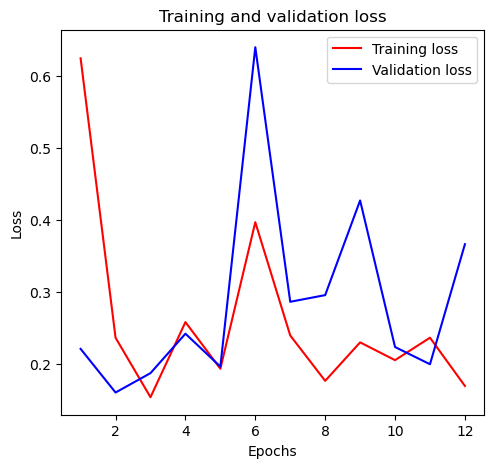

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

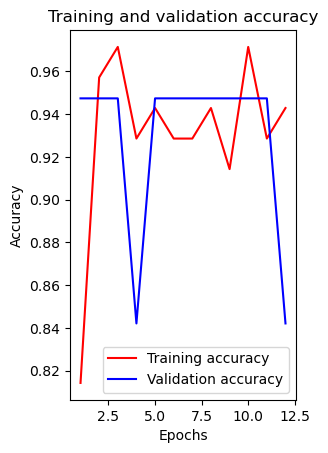

In [110]:
# Plot the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()